In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/naveenapaleti/Projects/ShopTrack360/data/customer_features.csv")

In [3]:
# Drop identifiers
X = df.drop(columns=['CustomerID', 'Country', 'ChurnLabel'])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

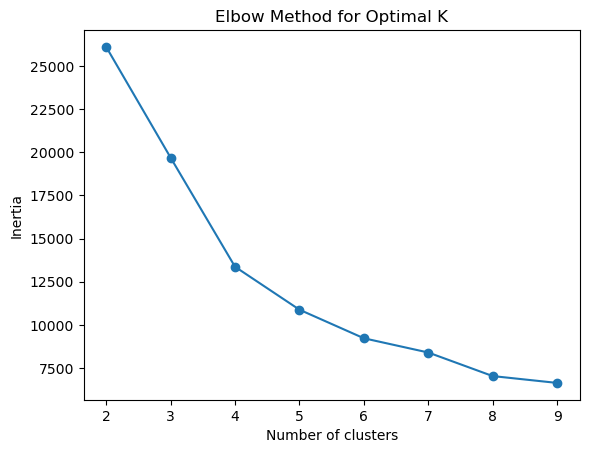

In [6]:
# Elbow method to find k
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

In [9]:
# Only keep numeric columns + segment
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Group by Segment and compute mean on numeric only
segment_profile = df.groupby('Segment')[numeric_cols].mean()

# Optional: Show only the top features you're interested in
segment_profile = segment_profile[['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'AvgSpendPerTxn']]

print(segment_profile)

segment_counts = df['Segment'].value_counts().sort_index()
segment_profile['CustomerCount'] = segment_counts.values


            Recency  Frequency       Monetary  AvgBasketSize  AvgSpendPerTxn
Segment                                                                     
0         29.675332   7.240597    3000.093734     238.757768      400.348649
1        162.500000   1.500000  122828.050000   57356.750000    80709.925000
2        136.547771   1.683121     590.775113     210.693935      354.557019
3          6.187500  75.625000  108334.765000    1220.832453     2240.609966


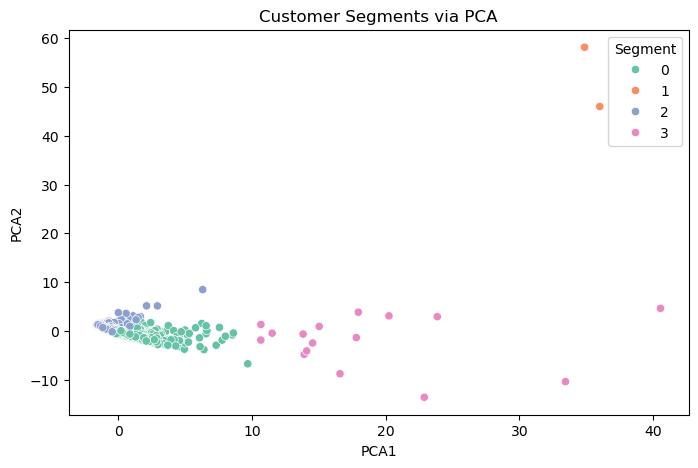

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Segment', palette='Set2')
plt.title('Customer Segments via PCA')
plt.show()


In [11]:
df.to_csv("/Users/naveenapaleti/Projects/ShopTrack360/data/customer_segments.csv", index=False)